In [1]:
# import the data
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline
import datetime
from dateutil.parser import parse

data = pd.read_csv('./Collisions.csv')
dataholidays = pd.read_csv('./usholidays.csv')
#print(data.shape)

def convert_to_date(date_in_some_format):
    """Use for converting INCDATE to usable format"""
    date_as_string = str(date_in_some_format)
    newdate = date_as_string[:10] # 10 Characters encompass date values Y-M-D
    return str(newdate)
data['INCDATE'] = data['INCDATE'].apply(convert_to_date)
data['INCDATE'] = pd.to_datetime(data['INCDATE'], errors='coerce')

#THESE v v v v v v v FUNCTIONS FILTER OUT UNKNOWNS AND EMPTY ENTRIES, FOR EACH RESPECTIVE COLUMN

def get_underInfluence(df):
    """This function takes a dataframe that contains a variable named UNDERINFL.
    It outputs a Series containing the counts for values of that variable."""
    filter1 = df["UNDERINFL"] != ""
    filter2 = df["UNDERINFL"] != "Unknown"
    dfNew = df[filter1]
    dfNew = dfNew[filter2]
    return dfNew['UNDERINFL'].value_counts().head(15)

def get_roadconditions(df):
    """This function takes a dataframe that contains a variable named ROADCOND.
    It outputs a Series containing the counts for values of that variable."""
    filter1 = df["ROADCOND"] != ""
    filter2 = df["ROADCOND"] != "Unknown"
    dfNew = df[filter1]
    dfNew = dfNew[filter2]
    return dfNew['ROADCOND'].value_counts().head(15)

def get_lightconditions(df):
    """This function takes a dataframe that contains a variable named LIGHTCOND.
    It outputs a Series containing the counts for values of that variable."""
    filter1 = df["LIGHTCOND"] != ""
    filter2 = df["LIGHTCOND"] != "Unknown"
    dfNew = df[filter1]
    dfNew = dfNew[filter2]
    return dfNew['LIGHTCOND'].value_counts().head(15)

def get_weather(df):
    """This function takes a dataframe that contains a variable named WEATHER.
    It outputs a Series containing the counts for values of that variable."""
    filter1 = df["WEATHER"] != ""
    filter2 = df["WEATHER"] != "Unknown"
    dfNew = df[filter1]
    dfNew = dfNew[filter2]
    return dfNew['WEATHER'].value_counts().head(15)

def get_inattention(df):
    """This function takes a dataframe that contains a variable named INATTENTIONIND.
    It outputs a Series containing the counts for values of that variable."""
    filter1 = df["INATTENTIONIND"] != ""
    filter2 = df["INATTENTIONIND"] != "Unknown"
    dfNew = df[filter1]
    dfNew = dfNew[filter2]
    print("N    ", len(dfNew) + 1 - (dfNew['INATTENTIONIND'] == 'Y').sum())
    return dfNew['INATTENTIONIND'].value_counts().head(15)


def get_speeding(df):
    """This function takes a dataframe that contains a variable named SPEEDING.
    It outputs a Series containing the counts for values of that variable."""
    filter1 = df["SPEEDING"] != ""
    filter2 = df["SPEEDING"] != "Unknown"
    dfNew = df[filter1]
    dfNew = dfNew[filter2]
    print("N    ", len(dfNew) + 1 - (dfNew['SPEEDING'] == 'Y').sum())
    return dfNew['SPEEDING'].value_counts().head(15)


def check_Holidays(df):
    """This function filters out dates regarding whether or not they're a federal holiday."""
    df.loc[df['INCDATE'].isin(dataholidays['Date'])] #Locates where holiday crashes are.
    return df['INCDATE'].isin(dataholidays['Date']).value_counts()

def check_HolidaysInattention(df):
    """This function checks out whether or not traffic accidents involved inattention during holidays."""
    dfHoliday = df.loc[df['INCDATE'].isin(dataholidays['Date'])]
    filter1 = df["INATTENTIONIND"] != ""
    filter2 = df["INATTENTIONIND"] != "Unknown"
    dfNew = dfHoliday[filter1]
    dfNew = dfHoliday[filter2]
    print("N    ", len(dfNew) + 1 - (dfNew['INATTENTIONIND'] == 'Y').sum())
    return dfNew['INATTENTIONIND'].value_counts().head(15)

def check_HolidaysSpeeding(df):
    """This function checks out whether or not traffic accidents involved speeding a federal holiday."""
    dfHoliday = df.loc[df['INCDATE'].isin(dataholidays['Date'])]
    filter1 = df["SPEEDING"] != ""
    filter2 = df["SPEEDING"] != "Unknown"
    dfNew = dfHoliday[filter1]
    dfNew = dfHoliday[filter2]
    print("N    ", len(dfNew) + 1 - (dfNew['SPEEDING'] == 'Y').sum())
    return dfNew['SPEEDING'].value_counts().head(15)

# COMMANDS HERE
#get_roadconditions(data)
#get_weather(data)
#get_lightconditions(data)
#get_underInfluence(data)
#get_inattention(data)
#get_speeding(data)

#check_Holidays(data)
#check_HolidaysInattention(data)
#check_HolidaysSpeeding(data)

In [57]:
# Question what are the most severe types of collisions on holidays?

def check_Holidays(df):
    """This function filters out dates regarding whether or not they're a federal holiday."""
    df.loc[df['INCDATE'].isin(dataholidays['Date'])] #Locates where holiday crashes are.
    return df['INCDATE'].isin(dataholidays['Date'])
    

holiday_data = data.loc[check_Holidays(data), ['INCDATE', 'COLLISIONTYPE', 'SEVERITYCODE']].dropna()
holiday_data = holiday_data.replace('3','4')
holiday_data = holiday_data.replace('2b','3')
holiday_data['SEVERITYCODE'] = holiday_data['SEVERITYCODE'].astype(int)
holiday_data.sort_values(ascending=False, by='SEVERITYCODE')
#holiday_data.head()
pass

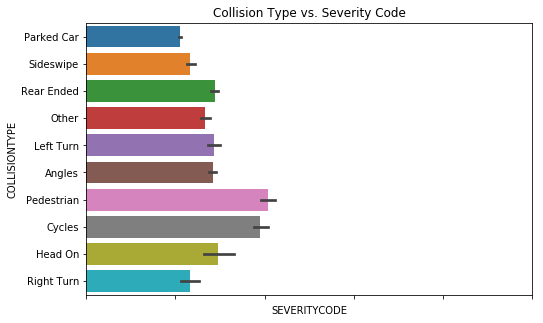

In [66]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

cols = [val for val in holiday_data['COLLISIONTYPE'].unique()]
ax = plt.figure(figsize=(8,5))

ax = sn.barplot(x = 'SEVERITYCODE', y = 'COLLISIONTYPE', data = holiday_data, order = cols)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Collision Type vs. Severity Code');
ax.set_xticks(np.arange(0,6,1));

In [59]:
# Question what are the most severe types of collisions on 

df = data.loc[~check_Holidays(data),['INCDATE', 'COLLISIONTYPE', 'SEVERITYCODE']].dropna()
df = df.replace('3','4')
df = df.replace('2b','4')
df['SEVERITYCODE'] = df['SEVERITYCODE'].astype(int)
df.sort_values(ascending=False, by='SEVERITYCODE')
#df.head()
pass

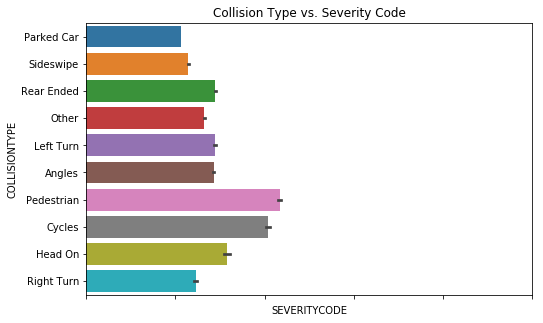

In [67]:
import seaborn as sn
import matplotlib.pyplot as plt

cols = [val for val in holiday_data['COLLISIONTYPE'].unique()]
ax = plt.figure(figsize=(8,5))

ax = sn.barplot(x = 'SEVERITYCODE', y = 'COLLISIONTYPE', data = df, order = cols)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Collision Type vs. Severity Code');
ax.set_xticks(np.arange(0,6,1));

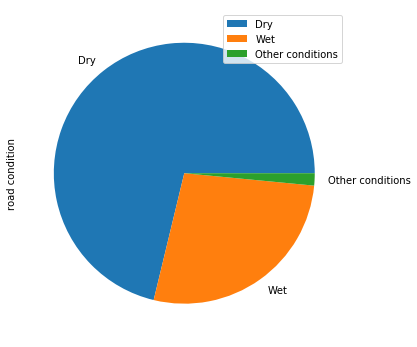

In [85]:
df = pd.DataFrame({'road condition': [121270, 46400 , 2584]}, index=['Dry', 'Wet', 'Other conditions'])
plot = df.plot.pie(y='road condition', figsize=(6, 6))

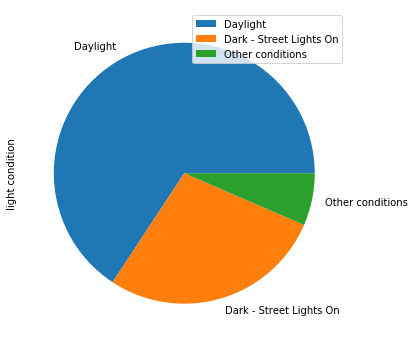

In [86]:
df = pd.DataFrame({'light condition': [112856, 47677, 11141]}, index=['Daylight', 'Dark - Street Lights On', 'Other conditions'])
plot = df.plot.pie(y='light condition', figsize=(6, 6))

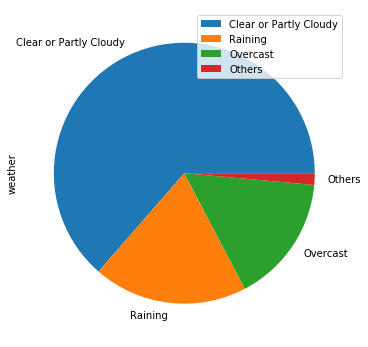

In [87]:
df = pd.DataFrame({'weather': [108160, 32484 , 27035, 2440]}, index=['Clear or Partly Cloudy', 'Raining', 'Overcast', 'Others'])
plot = df.plot.pie(y='weather', figsize=(6, 6))

In [68]:
# Question: Out of holiday collisions how many are due to people under the influence?
# Answer: Approximately 6%

holiday_data = data.loc[check_Holidays(data), 'UNDERINFL'].dropna()
holiday_data = holiday_data.replace('N', '0')
holiday_data = holiday_data.replace('Y', '1')
print('Holiday Dates')
print(holiday_data.value_counts())

Holiday Dates
0    3616
1     248
Name: UNDERINFL, dtype: int64


In [69]:
# Question: Out of non-holiday collisions how many are due to people under the influence?
# Answer: Approximately 4%

df = data.loc[~check_Holidays(data), 'UNDERINFL'].dropna()
df = df.replace('N', '0')
df = df.replace('Y', '1')
print('Non-Holiday Dates')
print(df.value_counts())

Non-Holiday Dates
0    172437
1      8962
Name: UNDERINFL, dtype: int64


In [70]:
msg1 = 'Non-Holiday percentage of crashes\ndue to drivers under the influence'
print(msg1 + ': ' + str((8962/181399) * 100))
msg2 = '\nHoliday percentage of crashes\ndue to drivers under the influence'
print(msg2 + ': ' + str((248/3864) * 100))

Non-Holiday percentage of crashes
due to drivers under the influence: 4.940490300387544

Holiday percentage of crashes
due to drivers under the influence: 6.418219461697723


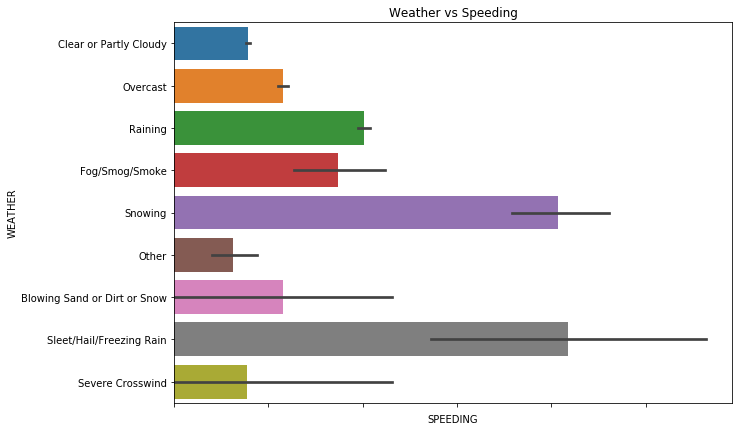

In [71]:
import seaborn as sn
import matplotlib.pyplot as plt

weather = data.loc[:, ['WEATHER', 'SPEEDING']]
weather = weather[(weather.WEATHER != 0)& (weather.WEATHER != 'Unknown')]
weather['SPEEDING'] = weather['SPEEDING'].map({np.nan: 0, 'Y': 1})

ax = plt.figure(figsize=(10,7))

ax = sn.barplot(x = 'SPEEDING', y = 'WEATHER', data = weather)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Weather vs Speeding');

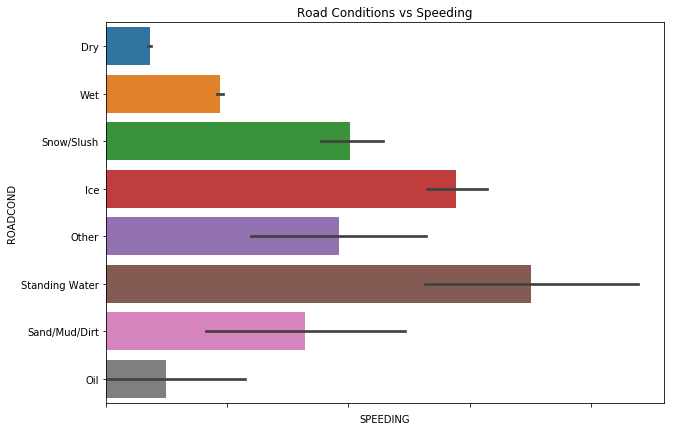

In [72]:
import seaborn as sn
import matplotlib.pyplot as plt

road = data.loc[:, ['ROADCOND', 'SPEEDING']]
road = road[road.ROADCOND != 'Unknown']
road['SPEEDING'] = road['SPEEDING'].map({np.nan: 0, 'Y': 1})

ax = plt.figure(figsize=(10,7))

ax = sn.barplot(x = 'SPEEDING', y = 'ROADCOND', data = road)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Road Conditions vs Speeding');

In [ ]:
get_years(series):
    result = []
    for n in range(len(series)):
        result.append

In [76]:
def convert_to_date(date_in_some_format):
    """Use for converting INCDATE to usable format"""
    date_as_string = str(date_in_some_format)
    newdate = date_as_string[:10] # 10 Characters encompass date values Y-M-D
    return str(newdate)
data['INCDATE'] = data['INCDATE'].apply(convert_to_date)

data["INCDATE"][0].split('-')[0]

def get_year(series):
    years = []
    for n in range(len(series)):
        years.append(series[n].split('-')[0])
    return years

df = data.loc[:, ['COLLISIONTYPE', 'PERSONCOUNT']]
df['YEAR'] = get_year(data["INCDATE"])
df['AMOUNT'] = 1


df = df.groupby('YEAR').sum().drop(['2003', '2019']).reset_index()
df.head()

,YEAR,PERSONCOUNT,AMOUNT
0,2004,30890,15457
1,2005,39078,16016
2,2006,38640,15794
3,2007,36859,15082
4,2008,34482,14139


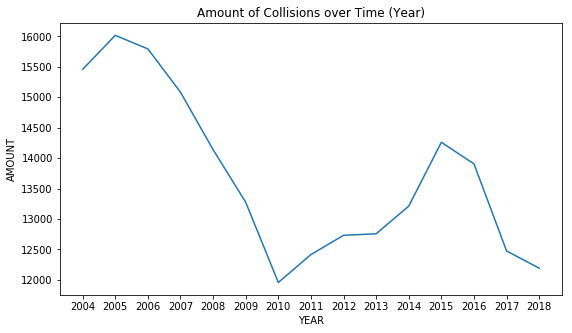

In [77]:
import seaborn as sn
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(9,5))

ax = sn.lineplot(x = 'YEAR', y = 'AMOUNT', data = df)
ax.set_title('Amount of Collisions over Time (Year)');

In [78]:
def get_type(df):
    return df['COLLISIONTYPE'].value_counts()

cond = ((data['COLLISIONTYPE']=='Rear Ended')|(data['COLLISIONTYPE']=='Head On')|(data['COLLISIONTYPE']=='Right Turn'))&(data['WEATHER']=='Raining')

rear_ends = data.loc[cond, ['WEATHER', 'COLLISIONTYPE']]
rear_ends = rear_ends.groupby('WEATHER').apply(get_type)
rear_ends

COLLISIONTYPE,Rear Ended,Head On,Right Turn
WEATHER,,,
Raining,6848,539,424


In [80]:
(6848/7811) * 100

87.67123287671232

In [82]:
def convert_to_date(date_in_some_format):
    """Use for converting INCDATE to usable format"""
    date_as_string = str(date_in_some_format)
    newdate = date_as_string[:10] # 10 Characters encompass date values Y-M-D
    return str(newdate)
data['INCDATE'] = data['INCDATE'].apply(convert_to_date)

def get_month_day(series):
    result = []
    for n in range(len(series)):
        val = series[n].split('-')
        month,day = val[1], val[2]
        val = month+'-'+day
        
        result.append(val)
    return result
        
def check_Holidays(df):
    """This function filters out dates regarding whether or not they're a federal holiday."""
    df.loc[df['INCDATE'].isin(dataholidays['Date'])] #Locates where holiday crashes are.
    return df['INCDATE'].isin(dataholidays['Date'])
    
holidays_data = data.loc[check_Holidays(data), 'INCDATE'].to_frame().reset_index()
holidays_data['Amount'] = 1
holidays_data['Date'] = get_month_day(holidays_data['INCDATE'])
holidays_data = holidays_data.groupby('Date').count().sort_values(by='Amount', ascending=False).reset_index()

In [83]:
holidays_data.head()

,Date,index,INCDATE,Amount
0,11-11,475,475,475
1,01-01,444,444,444
2,07-04,334,334,334
3,12-25,188,188,188
4,10-10,140,140,140


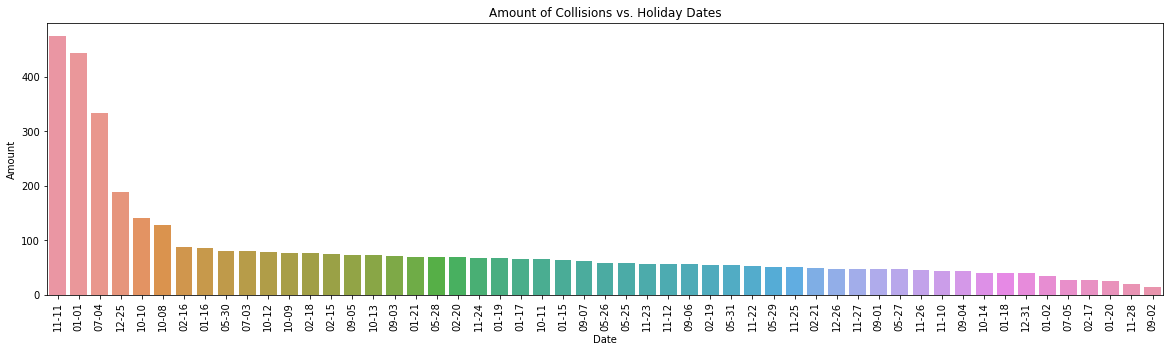

In [84]:
import seaborn as sn
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(20,5))
ax = sn.barplot(x = 'Date', y = 'Amount', data = holidays_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Amount of Collisions vs. Holiday Dates');